In [1]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
def load_txt(file_path: str) -> np.numarray:
    data = np.genfromtxt(file_path)
    return np.nan_to_num(data, nan=-1)

X = load_txt('./traindata.txt')
y = load_txt('trainlabel.txt')
y[y >= 1] = 1
X_test = load_txt('./testdata.txt')

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

In [3]:
# Split dataset into 5 consecutive folds. Each fold is then used once as a validation while the 4 remaining folds form the training set.
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
kf = KFold(n_splits=5, shuffle=True, random_state=0)

dt_acc = []
knn_acc = []
svm_acc = []
nn_acc = []
ensemble_acc = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    dt = DecisionTreeClassifier(random_state=0)
    knn = KNeighborsClassifier(n_neighbors=15)
    svm = SVC(kernel='linear', random_state=0)
    nn = MLPClassifier(hidden_layer_sizes=(
        10, 10), max_iter=10000, activation="relu",random_state=0)
    estimators = [('DecisionTree', dt),
                ('knn', knn),
                ('svm', svm),
                ('nn', nn)]
    ensemble = StackingClassifier(estimators=estimators)
    dt_acc.append(accuracy_score(
        dt.fit(X_train, y_train).predict(X_val), y_val))
    knn_acc.append(accuracy_score(
        knn.fit(X_train, y_train).predict(X_val), y_val))
    svm_acc.append(accuracy_score(
        svm.fit(X_train, y_train).predict(X_val), y_val))
    nn_acc.append(accuracy_score(
        nn.fit(X_train, y_train).predict(X_val), y_val))
    ensemble_acc.append(accuracy_score(
        ensemble.fit(X_train, y_train).predict(X_val), y_val))



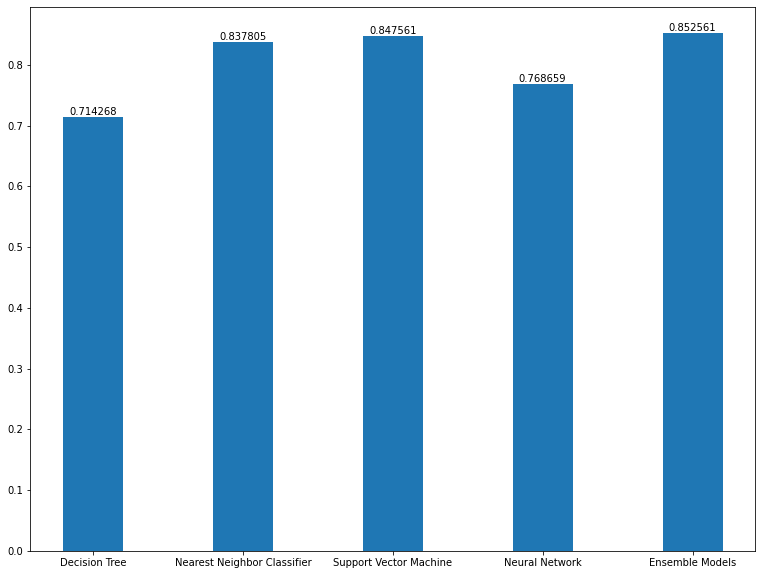

In [4]:
import matplotlib.pyplot as plt
acc = [np.average(dt_acc), np.average(knn_acc), np.average(svm_acc), np.average(nn_acc), np.average(ensemble_acc)]
labels = ['Decision Tree','Nearest Neighbor Classifier','Support Vector Machine','Neural Network','Ensemble Models']
x = np.array([1,2,3,4,5])
plt.figure(figsize=(13,10))
b = plt.bar(x, acc, tick_label = labels, width = 0.4)
plt.bar_label(b)
plt.show()


In [5]:
dt = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier(n_neighbors=15)
svm = SVC(kernel='linear', random_state=0)
nn = MLPClassifier(hidden_layer_sizes=(
    10, 10), max_iter=10000, activation="relu",random_state=0)
estimators = [('DecisionTree', dt),
              ('knn', knn),
              ('svm', svm),
              ('nn', nn)]

ensemble = StackingClassifier(estimators=estimators)
ensemble.fit(X, y)
y_pred = ensemble.predict(X_test)
np.savetxt('testlabel.txt',y_pred,fmt="%d")